In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import h5py
from tqdm import tqdm
import numpy as np
import os, glob
plt.style.use("science")

In [2]:
base_path = "/media/alexandre/Seagate/Data/HST_mag_limited_dataset/"
hf = h5py.File(base_path + "hudf_dataset.h5")

bands = ["b", "i", "v", "z"]
fits_files = {b: glob.glob(base_path + f"pstamps/{b}/*.fits") for b in bands}

# H5 dataset

In [3]:
hf.keys()

<KeysViewHDF5 ['hudf_ids', 'hudf_mags', 'hudf_resized', 'hudf_size', 'hudf_template', 'hudf_z']>

In [4]:
hf["hudf_template"].shape

(8543,)

In [7]:
np.unique(hf["hudf_template"]).shape

(101,)

In [5]:
np.unique(hf["hudf_template"])

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. ], dtype=float32)

In [8]:
hf["hudf_z"].shape

(8543,)

In [9]:
hf["hudf_mags"].shape

(8543, 11)

In [10]:
hf["hudf_resized"].shape

(8543, 4, 224, 224)

0.0 0.0025610602
0.0 0.005691759
0.0 0.00044017928
0.0 0.0009439305
0.0 0.00077929127
0.0 0.0011549154
0.0 0.005417657
0.0 0.0043028877
0.0 0.00023514102
0.0 0.00024759848
0.0 0.0013524265
0.0 0.0010679521
0.0 0.0013692816
0.0 0.0018662977
0.0 0.0019697968
0.0 0.015939597


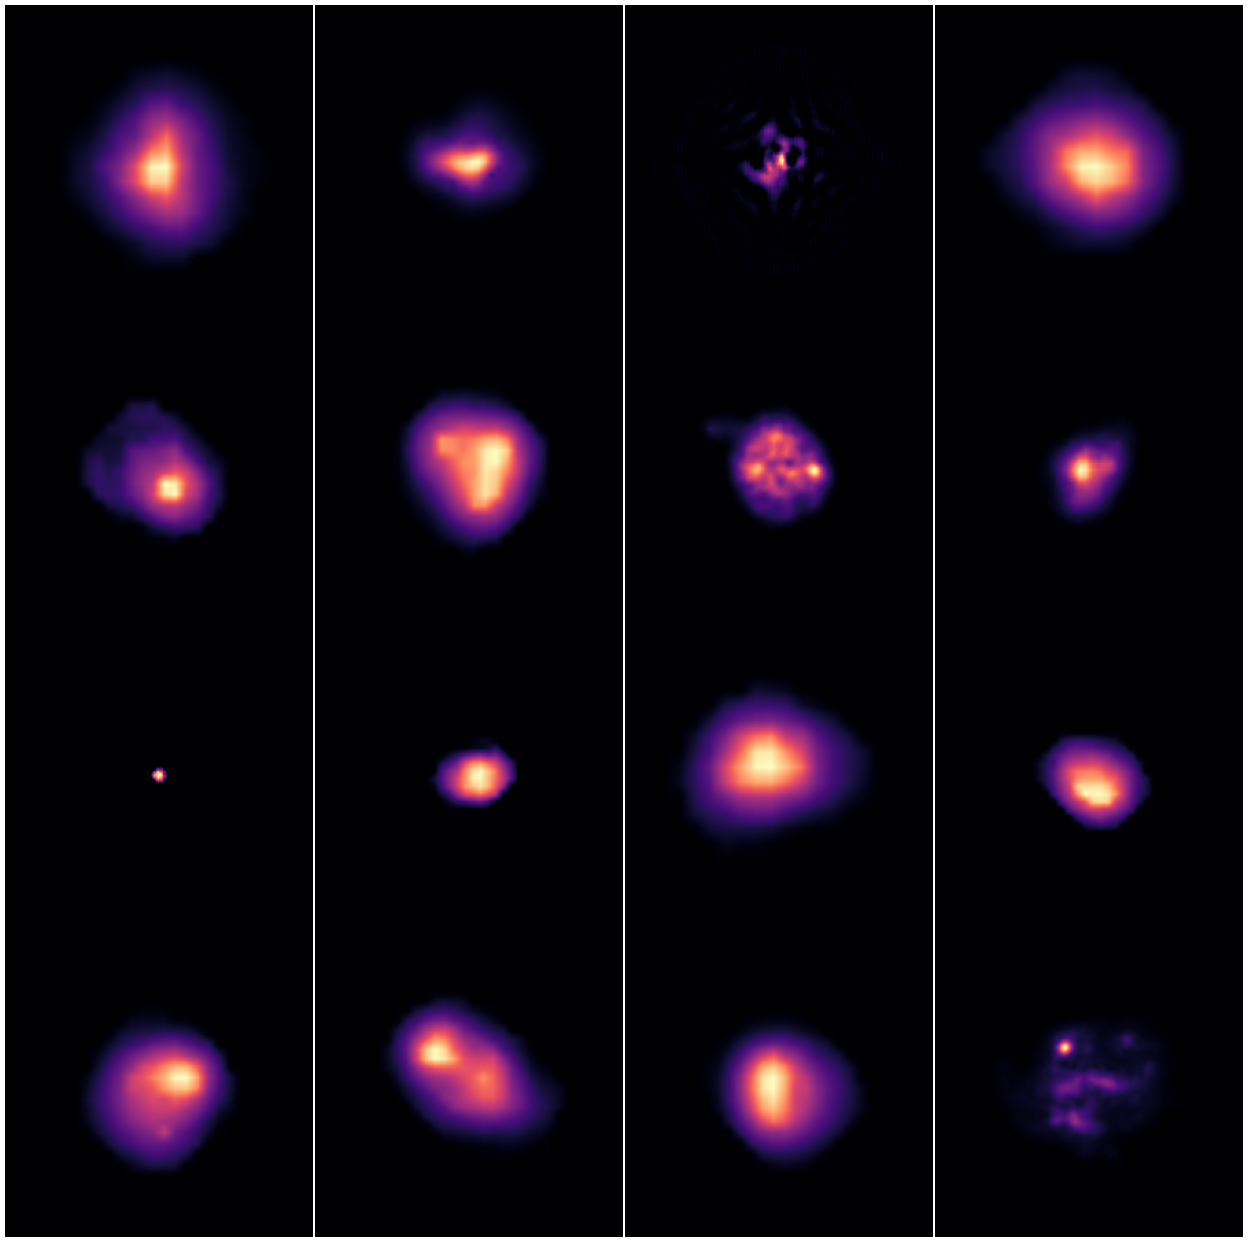

In [11]:
B = 16
band = 2
k = np.random.randint(len(hf["hudf_resized"]) - B)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        ki = i * 4 + j
        img = hf["hudf_resized"][k+ki, band]
        print(img.min(), img.max())
        axs[i, j].imshow(img, cmap="magma")
        axs[i, j].axis("off")
plt.subplots_adjust(hspace=0, wspace=0)

# Fits file dataset

In [12]:
band = "i"
fits.open(fits_files[band][200])[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                   32 / length of data axis 1                          
NAXIS2  =                   32 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CREATOR = 'ShapeLens++'                                                         
BASEFILE= 'h_udf_wfc_i_drz_img.fits' / name of source file                      
ID      =                   45 / object id                                      
XMIN    =                 4942 / min(X) in image pixels                         
YMIN    =                  9

In [13]:
sum([len(v) for v in fits_files.values()])

2245

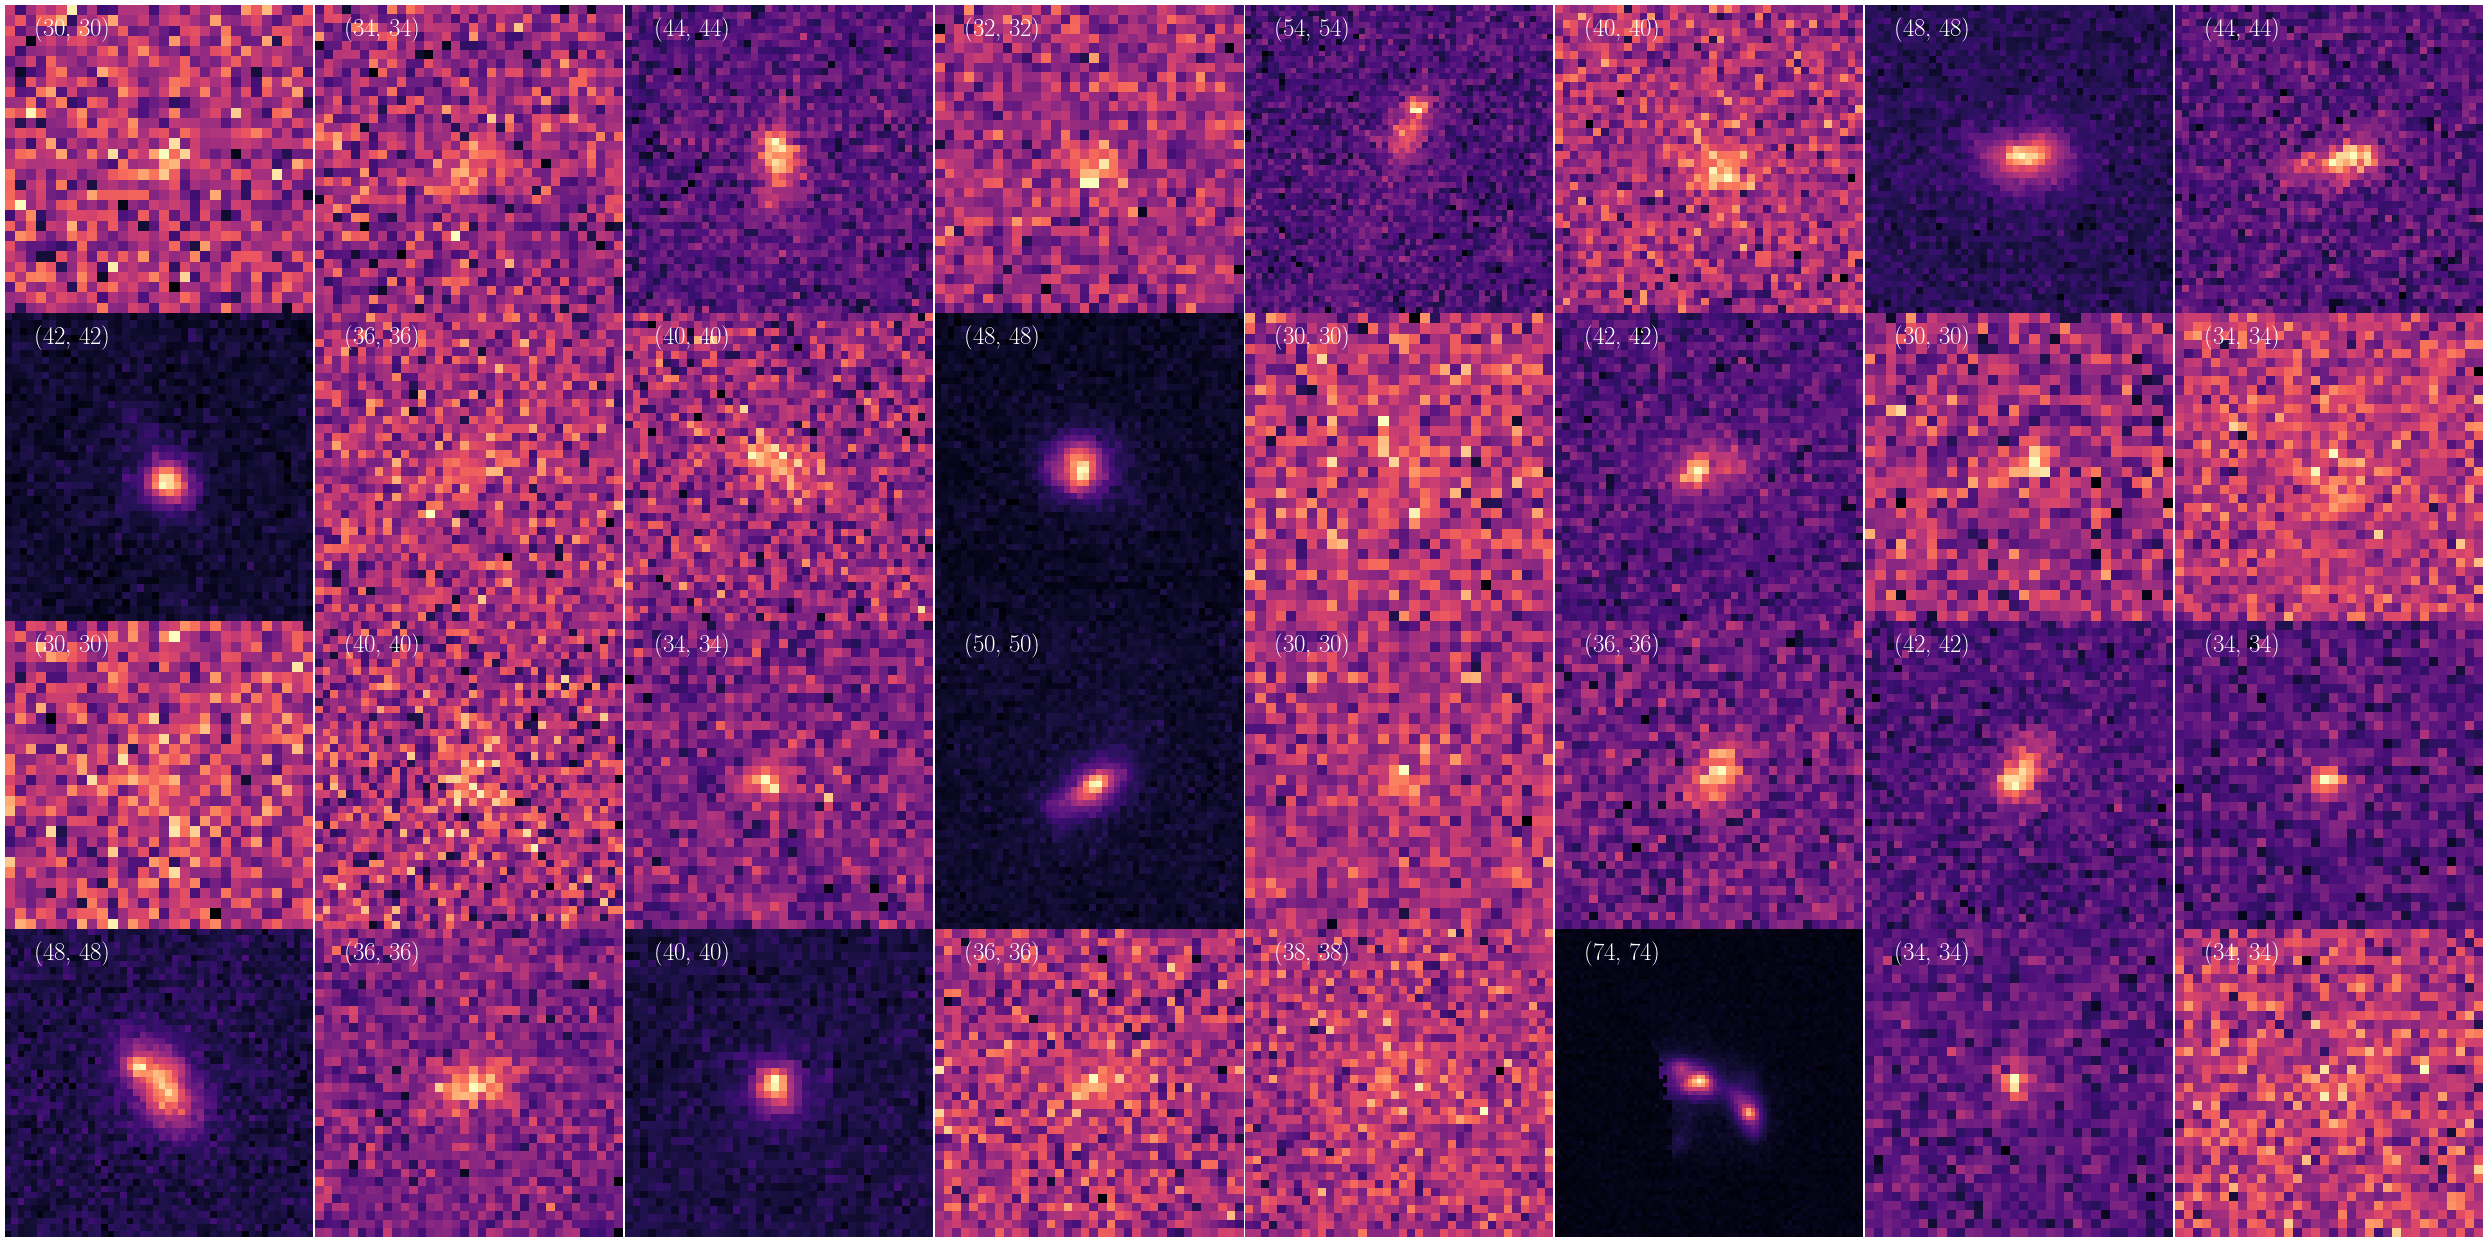

In [14]:
band = "i"
B = 32
k = np.random.randint(len(fits_files[band]) - B)


fig, axs = plt.subplots(4, 8, figsize=(32, 16))
for i in range(4):
    for j in range(8):
        ki = i * 8 + j
        img = fits.open(fits_files[band][k+ki])[0].data
        shape = img.shape
        axs[i, j].imshow(img, cmap="magma")
        axs[i, j].annotate(f"{shape}", xy=(0.1, 0.9), xycoords="axes fraction", color="w", fontsize=18)
        axs[i, j].axis("off")
plt.subplots_adjust(hspace=0, wspace=0)

# Full fits

In [15]:
fs_fits_list = glob.glob(base_path + "full_size/*sci.fits")

In [16]:
data = fits.open(fs_fits_list[-1])
data.info()

Filename: /media/alexandre/Seagate/Data/HST_mag_limited_dataset/full_size/hlsp_xdf_hst_acswfc-30mas_hudf_f606w_v1_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (10500, 10500)   float32   


In [17]:
# data[0].header

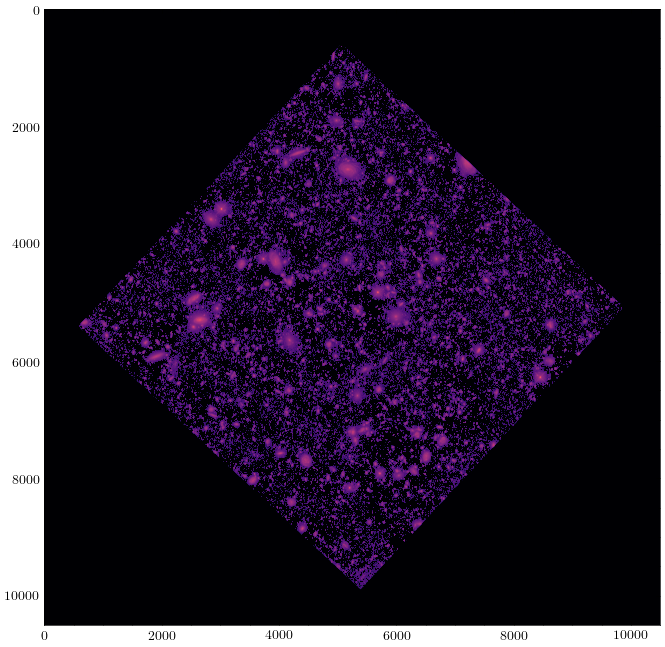

In [18]:
wcs = WCS(data[0].header)

plt.figure(figsize=(8, 8))
# plt.subplot(projection=wcs)
plt.imshow(data[0].data, cmap="magma", norm=plt.cm.colors.LogNorm(vmin=0, vmax=1e4, clip=True))

In [19]:
# Can I estimate the noise structure form this file? I could use SLIC + diffusion to extract information from each files!
N = 30000
img_size = 32
good_crops = []
bad_crops = []

criteria = 1 # percentage of pixel with a flux above 3 sigma
flux_criteria = 3e-4 # less conservative

    
data = fits.open(fs_fits_list[-1])
img = data[0].data
crops = create_random_crops(img, img_size, img_size, N) # correct flux with PAM here
# Ignore cosmic rays, we don't mind them too much. We want to avoid objects that look like signal

for c in crops:
    above_zero = c > 0
    flux = c[above_zero].sum()/img_size**2 
    if (flux < flux_criteria) & np.all(c != 0): # second criteria identifies pixels on the border (a bit conservative but we have lots of crops)
        good_crops.append(c)
    elif (flux != 0): 
        bad_crops.append(c)
    else:
        continue
print(f"{len(good_crops):d} good crops and {len(bad_crops):d} bad crops")

NameError: name 'create_random_crops' is not defined

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(32, 32))


for i in range(8):
    for j in range(4):
        k = np.random.randint(len(good_crops))
        above_zero = good_crops[k] > 0
        axs[i, j].imshow(good_crops[k], cmap="RdBu_r")
        axs[i, j].annotate(f"flux {good_crops[k][above_zero].sum()/img_size**2:.2e}", xy=(0.1, 0.8), xycoords="axes fraction", color="w", fontsize=25, backgroundcolor="k")
        axs[i, j].axis("off")
        
    for j in range(4):
        k = np.random.randint(len(bad_crops))
        above_zero = bad_crops[k] > 0
        axs[i, 4+j].imshow(bad_crops[k], cmap="RdBu_r")
        axs[i, 4+j].annotate(f"flux {bad_crops[k][above_zero].sum()/img_size**2:.2e}", xy=(0.1, 0.8), xycoords="axes fraction", color="w", fontsize=25, backgroundcolor="k")
        axs[i, 4+j].axis("off")
plt.subplots_adjust(hspace=0, wspace=0)

In [ ]:
# Maybe a gaussian likelihood can get us going.
px_values = np.stack(good_crops).ravel()

mode = np.quantile(px_values, q=0.5)
three_sigma = np.quantile(px_values, q=0.997)
two_sigma = np.quantile(px_values, q=0.95)
sigma = np.std(px_values)


plt.hist(np.stack(good_crops).ravel(), bins=100)
plt.annotate(r"Dark sky flux = %.2e $e^{-}/s$" % mode, xy=(0.3, 0.8), xycoords="axes fraction")
plt.annotate(r"Dark sky 99.5 = %.2e $e^{-}/s$" % three_sigma, xy=(0.3, 0.7), xycoords="axes fraction")
plt.annotate(r"Dark sky 95 = %.2e $e^{-}/s$" % two_sigma, xy=(0.3, 0.6), xycoords="axes fraction")
plt.annotate(r"Dark sky $\sigma$ = %.2e $e^{-}/s$" % sigma, xy=(0.3, 0.5), xycoords="axes fraction");

# Samples

In [24]:
files = glob.glob("samples/*.h5")
hf = h5py.File(files[0], "r")
hf["images"]

<HDF5 dataset "images": shape (1000, 1, 224, 224), type "<f4">

-0.0043195793 6.9644856
-0.0060968595 12.977543
-0.005948769 3.3207889
-0.0071835704 0.47981524
-0.00609101 1.5354898
-0.0067751165 1.5209253
-0.008280821 1.1261925
-0.007465111 0.72761273
-0.0059840856 0.84932417
-0.007048676 0.15806231
-0.0065702815 0.26755017
-0.006598074 0.6382862
-0.006600336 0.93096817
-0.0066937907 0.9891579
-0.007034353 2.502578
-0.00786287 0.11758354


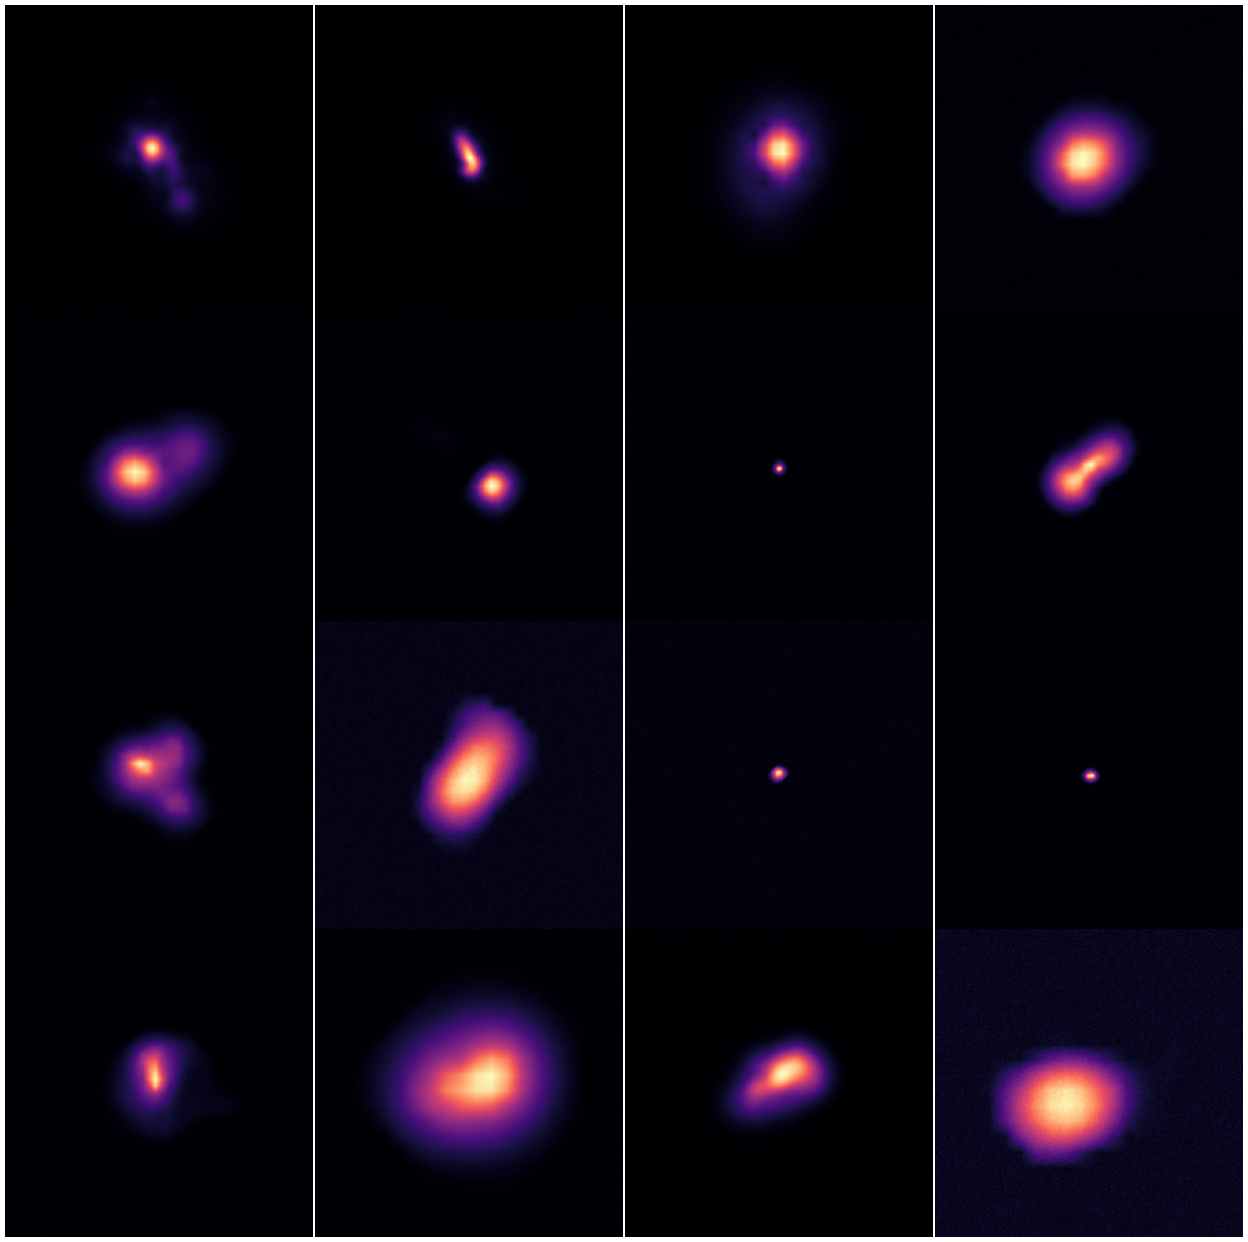

In [25]:
B = 16
band = 0
k = np.random.randint(len(hf["images"]) - B)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        ki = i * 4 + j
        img = hf["images"][k+ki, band]
        print(img.min(), img.max())
        axs[i, j].imshow(img, cmap="magma")
        axs[i, j].axis("off")
plt.subplots_adjust(hspace=0, wspace=0)